# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

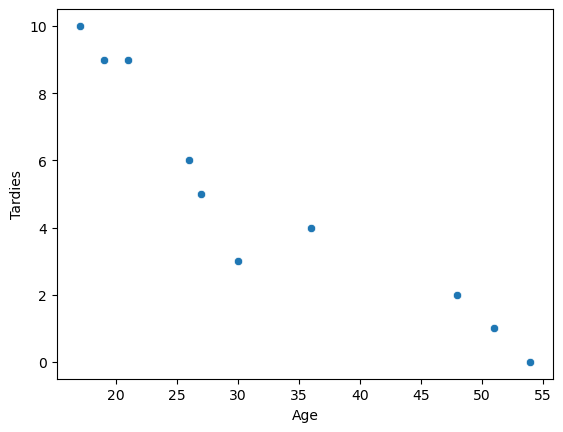

In [2]:
sns.scatterplot(x = "Age", y="Tardies", data = student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- Yes, it is a negative linear correlation

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [3]:
student_data.corr()


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [4]:
import numpy as np
student_data['Age'].cov(student_data['Tardies'])

-45.56666666666667

- The difference is that corr() tells you how much linear is the correlation, while the variance tells you how much one variable changes one the other changes.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
from sklearn.linear_model import LinearRegression as lr

X = student_data[['Age']]  # Input features
y = student_data['Tardies']  # Target variable


model = lr().fit(X, y)
coef_ = model.coef_
coef_


array([-0.24282077])

Plot your regression model on your scatter plot.

In [6]:
intercept_ = model.intercept_
intercept_

12.888803363135771

- I am using a linear regression model

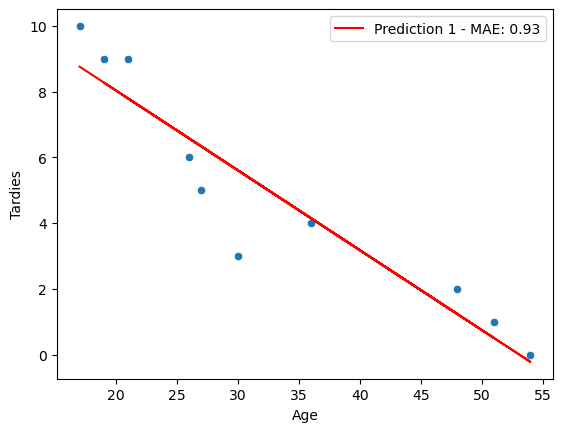

In [7]:
student_data["prediction_1"]= -0.24282077 * student_data.Age + 12.888803363135771
student_data
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data.prediction_1, c="red", label="Prediction 1 - MAE: 0.93")
plt.legend();


In [8]:
student_data["error_1"] = (student_data.Tardies - student_data.prediction_1).abs()
mean_absolute_error_1 = sum(student_data.error_1) / len(student_data)
mean_absolute_error_1


0.9319083343728456

In [9]:
RSS = ((student_data.prediction_1 - student_data.Tardies) ** 2).sum()
TSS = ((student_data.prediction_1 - student_data.Tardies.mean()) ** 2).sum()
r_2 = 1 - RSS/TSS
r_2

0.8662472866764284

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- Our model has a r_2 of 0.86, meaning that explains 86% of the variance of our data. I believe it is a good model

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
data_2.sample()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
17253,2007,4.0,14.33087,23,1750,386.391304


In [13]:
data=pd.read_csv("vehicles.csv")
data_2=data[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]   

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

- As we can see, the variable with higher coefficient is the Fuel Barrels/Year, which is confirmed by the corr() function below as well.

In [14]:
import statsmodels.formula.api as smf
results = smf.ols("data_2['CO2 Emission Grams/Mile'] ~ Cylinders + data_2['Year']+ data_2['Fuel Barrels/Year'] + data_2['Combined MPG'] + data_2['Fuel Cost/Year']", data=data_2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     data_2['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                           OLS   Adj. R-squared:                  0.981
Method:                                Least Squares   F-statistic:                 3.687e+05
Date:                               Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                                       17:46:04   Log-Likelihood:            -1.5173e+05
No. Observations:                              35952   AIC:                         3.035e+05
Df Residuals:                                  35946   BIC:                         3.035e+05
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     769.8883     19.392     39.702      0.000     731.880     807.897
Cylinders                       1.8788      0.083     22.598      0.000       1.716       2.042
data_2['Year']                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
data_2['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
data_2['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
data_2['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
data_2

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [16]:
data_2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [17]:
X = data_2[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = data_2['CO2 Emission Grams/Mile']
model_2 = lr().fit(X, y)
coef_ = model_2.coef_
coef_



array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [18]:
model_2

LinearRegression()

In [19]:
intercept_ = model_2.intercept_
intercept_

769.8882836464861

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

- All have a positive impact on the CO2 emissions except for the MPG. A

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     data_2['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                           OLS   Adj. R-squared:                  0.981
Method:                                Least Squares   F-statistic:                 3.687e+05
Date:                               Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                                       17:46:06   Log-Likelihood:            -1.5173e+05
No. Observations:                              35952   AIC:                         3.035e+05
Df Residuals:                                  35946   BIC:                         3.035e+05
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     769.8883     19.392     39.702      0.000     731.880     807.897
Cylinders                       1.8788      0.083     22.598      0.000       1.716       2.042
data_2['Year']                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
data_2['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
data_2['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
data_2['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 